In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from scipy.stats import chisquare
from statsmodels.stats.proportion import proportions_chisquare
import seaborn as sns

In [52]:
raw = pd.read_csv("Index2018.csv")
df_comp = raw.copy()
df_comp.date = pd.to_datetime(raw.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method="ffill")

In [53]:
df_comp['market_value'] = df_comp.ftse

In [54]:
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## Creating returns

In [55]:
df['returns'] = df.market_value.pct_change(1)*100

<ipython-input-55-6f3746182e20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1)*100


## ARIMA(1,1,1)

In [56]:
model_prices_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
result_prices_ar_1_i_1_ma_1 = model_prices_ar_1_i_1_ma_1.fit()
result_prices_ar_1_i_1_ma_1.summary()

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Wed, 02 Dec 2020   AIC                          55214.010
Time:                        20:19:55   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.865
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7460      0.059     12.659      0.000       0.631       0.862
ma.L1         -0.7920      0.053    -14.930      0.000      -0.896      -0.688
sigma2      3498.4453     40.925     85.484      0.000    3418.233    3578.657
===================================================================================
Ljung-Box (L1) (Q):                   2.62   Jarque-Bera (JB):              3326.29
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Residuals of the ARIMA(1,1,1)

In [57]:
residuals_ar_1_i_1_ma_1 = result_prices_ar_1_i_1_ma_1.resid

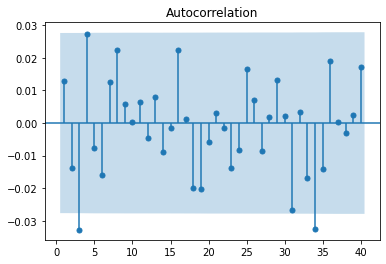

In [58]:
sgt.plot_acf(residuals_ar_1_i_1_ma_1, zero=False, lags=40)
plt.show()

It seems that we have lag 3 and lag 4 which is highly significant.

## Higher-lag ARIMA Models

In [59]:
arima_models = dict()
arima_results = dict()
for p in range(1,5):
    for q in range(1,5):
        print(f"Model ARIMA({p}, 1, {q})")
        model = ARIMA(df.market_value, order=(p,1,q))
        arima_models[f"{p}_1_{q}"] = model
        result = model.fit()
        arima_results[f"{p}_1_{q}"] = result
        print(result.summary())
        print("/"*100)

Model ARIMA(1, 1, 1)


D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Wed, 02 Dec 2020   AIC                          55214.010
Time:                        20:19:57   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.865
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7460      0.059     12.659      0.000       0.631       0.862
ma.L1         -0.7920      0.053    -14.930      0.000      -0.896      -0.688
sigma2      3498.4453     40.925     85.484      0.0

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -27600.131
Date:                Wed, 02 Dec 2020   AIC                          55208.261
Time:                        20:20:01   BIC                          55234.346
Sample:                    01-07-1994   HQIC                         55217.402
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6284      0.071      8.902      0.000       0.490       0.767
ar.L2         -0.0471      0.011     -4.223      0.000      -0.069      -0.025
ma.L1         -0.6513      0.069     -9.416      0.0

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -27591.071
Date:                Wed, 02 Dec 2020   AIC                          55196.143
Time:                        20:20:15   BIC                          55241.791
Sample:                    01-07-1994   HQIC                         55212.139
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3313      0.238      1.392      0.164      -0.135       0.798
ar.L2          0.3163      0.095      3.340      0.001       0.131       0.502
ar.L3         -0.0534      0.016     -3.372      0.0

From the list, models that has 5% significant coefficients are ARIMA(1,1,2), ARIMA(1,1,3), ARIMA(2,1,1), ARIMA(3,1,1), ARIMA(3,1,2)

In [60]:
print("\n ARIMA(1,1,1) \t LLF:", arima_results["1_1_1"].llf, "\t AIC:", arima_results["1_1_1"].aic)
print("\n ARIMA(1,1,2) \t LLF:", arima_results["1_1_2"].llf, "\t AIC:", arima_results["1_1_2"].aic)
print("\n ARIMA(1,1,3) \t LLF:", arima_results["1_1_3"].llf, "\t AIC:", arima_results["1_1_3"].aic)
print("\n ARIMA(2,1,1) \t LLF:", arima_results["2_1_1"].llf, "\t AIC:", arima_results["2_1_1"].aic)
print("\n ARIMA(3,1,1) \t LLF:", arima_results["3_1_1"].llf, "\t AIC:", arima_results["3_1_1"].aic)
print("\n ARIMA(3,1,2) \t LLF:", arima_results["3_1_2"].llf, "\t AIC:", arima_results["3_1_2"].aic)


 ARIMA(1,1,1) 	 LLF: -27604.005025656326 	 AIC: 55214.01005131265

 ARIMA(1,1,2) 	 LLF: -27600.407632540115 	 AIC: 55208.81526508023

 ARIMA(1,1,3) 	 LLF: -27590.72348194531 	 AIC: 55191.44696389062

 ARIMA(2,1,1) 	 LLF: -27600.130551053826 	 AIC: 55208.26110210765

 ARIMA(3,1,1) 	 LLF: -27592.336116474544 	 AIC: 55194.67223294909

 ARIMA(3,1,2) 	 LLF: -27590.920318060118 	 AIC: 55193.840636120236


ARIMA(1,1,3) shows the highest LLF and the lowest AIC. Since ARIMA(1,1,1) and ARIMMA(1,1,2) are the nested model of ARIMA(1,1,3), we need to run the LLR test to make sure that ARIMA(1,1,3) is significantly different from ARIMA(1,1,1) and ARIMA(1,1,2).

In [61]:
def LLR_test(mod1, mod2, df=1):
    llf_mod1 = mod1.fit().llf
    llf_mod2 = mod2.fit().llf
    diff = (2*(llf_mod2- llf_mod1))
    p = chi2.sf(diff, df=df).round(3)
    return p

In [62]:
LLR_test(arima_models["1_1_2"], arima_models["1_1_3"])

0.0

In [63]:
LLR_test(arima_models["1_1_1"], arima_models["1_1_3"], df=2)

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.0

From here, we can observe that ARIMA(1,1,3) is significantly better than ARIMA(1,1,1) and ARIMA(1,1,2).

Now, we need to perform ACF test on the residuals of ARIMA(1,1,3) to see if they resemble white noise.

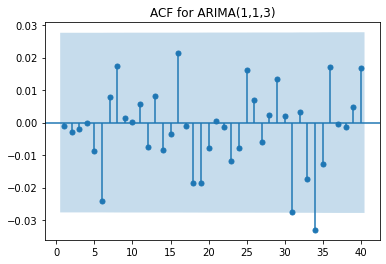

In [64]:
sgt.plot_acf(arima_results["1_1_3"].resid, zero=False, lags=40)
plt.title("ACF for ARIMA(1,1,3)")
plt.show()

Note: from tutorial, model ARIMA(5,1,1) shows a better result.

In [65]:
model_prices_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
result_prices_ar_5_i_1_ma_1 = model_prices_ar_5_i_1_ma_1.fit()
result_prices_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.845
Date:                Wed, 02 Dec 2020   AIC                          55187.689
Time:                        20:20:26   BIC                          55233.338
Sample:                    01-07-1994   HQIC                         55203.685
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4006      0.153      2.618      0.009       0.101       0.701
ar.L2         -0.0444      0.011     -4.071      0.000      -0.066      -0.023
ar.L3         -0.0542      0.013     -4.226      0.000      -0.079      -0.029
ar.L4          0.0587      0.015      3.914      0.000       0.029       0.088
ar.L5         -0.0580      0.009     -6.337      0.000      -0.076      -0.040
ma.L1         -0.4208      0.153     -2.743      0.006      -0.721      -0.120
sigma2      3479.0026     41.909     83.013      0.000    3396.862    3561.143
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3060.40
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
print("\n ARIMA(1,1,3) \t LLF:", arima_results["1_1_3"].llf, "\t AIC:", arima_results["1_1_3"].aic)
print("\n ARIMA(5,1,1) \t LLF:", result_prices_ar_5_i_1_ma_1.llf, "\t AIC:",result_prices_ar_5_i_1_ma_1.aic)


 ARIMA(1,1,3) 	 LLF: -27590.72348194531 	 AIC: 55191.44696389062

 ARIMA(5,1,1) 	 LLF: -27586.844609581116 	 AIC: 55187.68921916223


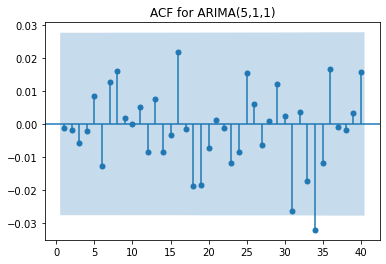

In [67]:
sgt.plot_acf(result_prices_ar_5_i_1_ma_1.resid, zero=False, lags=40)
plt.title("ACF for ARIMA(5,1,1)")
plt.show()

## Find the I value

In [68]:
df['delta_price']  = df.market_value.diff(1)

<ipython-input-68-e11d90d50788>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_price']  = df.market_value.diff(1)


In [69]:
model_prices_ar_1_i_0_ma_1 = ARIMA(df.delta_price.dropna(), order=(1,0,1))
result_prices_ar_1_i_0_ma_1 = model_prices_ar_1_i_0_ma_1.fit()
result_prices_ar_1_i_0_ma_1.summary()

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            delta_price   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27603.666
Date:                Wed, 02 Dec 2020   AIC                          55215.333
Time:                        20:20:28   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5639      0.753      0.749      0.454      -0.911       2.039
ar.L1          0.7476      0.059     12.673      0.000       0.632       0.863
ma.L1         -0.7937      0.053    -14.871      0.000      -0.898      -0.689
sigma2      3496.6352     41.191     84.888      0.000    3415.902    3577.368
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):              3327.38
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
arima_results["1_1_1"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Wed, 02 Dec 2020   AIC                          55214.010
Time:                        20:20:28   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.865
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7460      0.059     12.659      0.000       0.631       0.862
ma.L1         -0.7920      0.053    -14.930      0.000      -0.896      -0.688
sigma2      3498.4453     40.925     85.484      0.000    3418.233    3578.657
===================================================================================
Ljung-Box (L1) (Q):                   2.62   Jarque-Bera (JB):              3326.29
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We observe that ARIMA(1,0,1) and ARMA(1,1) shows the similar results.

In [71]:
sts.adfuller(df.delta_price[1:])

(-32.244093495707475,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

ADF tests also shows that differencing of 1 is sufficient to make the data stationary.

## ARIMAX

In [74]:
model_ar_1_i_ma_1_Xspx = ARIMA(df.market_value, exog=df.spx, order=(1,1,1))
results_ar_1_i_ma_1_Xspx = model_ar_1_i_ma_1_Xspx.fit()
results_ar_1_i_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26693.392
Date:                Wed, 02 Dec 2020   AIC                          53394.784
Time:                        21:05:17   BIC                          53420.869
Sample:                    01-07-1994   HQIC                         53403.925
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6928      0.035     76.407      0.000       2.624       2.762
ar.L1          0.2571      0.029      8.812      0.000       0.200       0.314
ma.L1         -0.5460      0.025    -21.791      0.000      -0.595      -0.497
sigma2      2433.0771     27.350     88.961      0.000    2379.472    2486.682
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              4423.90
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX

In [75]:
 from statsmodels.tsa.statespace.sarimax import SARIMAX

In [77]:
model_sarimax = SARIMAX(df.market_value, exog=df.spx, order=(1,1,1), seasonal_order=(2,0,1,5))
result_sarimax = model_sarimax.fit()
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 5)   Log Likelihood              -26690.649
Date:                           Wed, 02 Dec 2020   AIC                          53395.298
Time:                                   21:10:51   BIC                          53440.946
Sample:                               01-07-1994   HQIC                         53411.293
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6947      0.035     76.380      0.000       2.626       2.764
ar.L1          0.2394      0.030      8.097      0.000       0.181       0.297
ma.L1         -0.5303      0.026    -20.728      0.000      -0.580      -0.480
ar.S.L5        0.5776      0.478      1.208      0.227      -0.360       1.515
ar.S.L10       0.0074      0.023      0.324      0.746      -0.037       0.052
ma.S.L5       -0.6085      0.478     -1.272      0.203      -1.546       0.329
sigma2      2430.4433     27.775     87.505      0.000    2376.005    2484.881
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              4297.04
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

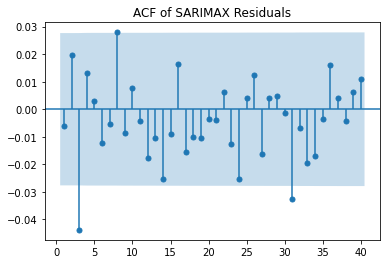

In [81]:
sgt.plot_acf(result_sarimax.resid, zero=False, lags=40, title="ACF of SARIMAX Residuals")
plt.show()